# Guia 1

## Ejercicio 1

Implemente rutinas que permitan el entrenamiento y prueba de un perceptrón simple con una cantidad variable de entradas. Se deben tener en cuenta las siguientes capacidades:

- lectura de los patrones de entrenamiento (entradas y salidas) desde un archivo en formato texto separado por comas,
- selección del criterio de finalización del entrenamiento y el número máximo de épocas,
- selección de la tasa de aprendizaje,
- prueba del perceptrón entrenado mediante archivos de texto con el mismo formato separado por comas.

Una vez obtenido dicho programa, pruébelo en la resolución del problema `OR`, utilizando los archivos de patrones `OR_trn.csv` y `OR_tst.csv` para el entrenamiento y la prueba, respectivamente. Los patrones que se proveen en estos archivos fueron generados a partir de los puntos $(1,1)$, $(1,-1)$, $(-1,1)$ y $(-1,-1)$ con pequeñas desviaciones aleatorias ($<5%$) en torno a éstos. Recuerde que para que la prueba tenga validez se deben utilizar patrones nunca presentados en el entrenamiento, para ésto se dispone de dos archivos de datos diferentes.

# Solución

Se provee la clase `Perceptron` en [`Perceptron.py`](./Perceptron.py):

- Constructor `Perceptron(N, rate, maxEpocas, funcionActivacion, bias)`
  - `N`: número de entradas (sin contar umbral/bias).
  - `rate`: tasa de aprendizaje.
  - `maxEpocas`: número máximo de épocas en el entrenamiento.
  - `funcionActivacion`: función de activación.
  - `bias` (opcional): valor umbral inicial.
- Método `Perceptron.calcular(x)`: calcula la salida del perceptron dadas unas entradas
  - `x`: valores de entrada, incluyendo el peso `-1` del umbral/bias.
- Método `Perceptron.entrenar(x, yd, targetError = -1)`: entrena el perceptron a partir de unas entradas y salidas esperadas
  - `x`: arreglo de arreglos de entradas
  - `yd`: arreglo de salidas esperadas
  - `targetError` (opcional): tasa de error donde cortar. Por defecto `-1`, por lo que si o si realiza el numero maximo de epocas.
- Método `Perceptron.test(x, yd)`: prueba la efectividad del perceptrón a partir de una entradas y salidas esperadas


<>:26: SyntaxWarning: invalid escape sequence '\F'
<>:41: SyntaxWarning: invalid escape sequence '\F'
<>:51: SyntaxWarning: invalid escape sequence '\F'
<>:26: SyntaxWarning: invalid escape sequence '\F'
<>:41: SyntaxWarning: invalid escape sequence '\F'
<>:51: SyntaxWarning: invalid escape sequence '\F'
C:\Users\giuli\AppData\Local\Temp\ipykernel_6080\1394286030.py:26: SyntaxWarning: invalid escape sequence '\F'
  trainFile = cargarCSV("C:\FICH\INTELIGENCIA COMPUTACIONAL\Guia1\OR_trn.csv")
C:\Users\giuli\AppData\Local\Temp\ipykernel_6080\1394286030.py:41: SyntaxWarning: invalid escape sequence '\F'
  gifPath="C:\FICH\INTELIGENCIA COMPUTACIONAL\Guia1\OR.gif",
C:\Users\giuli\AppData\Local\Temp\ipykernel_6080\1394286030.py:51: SyntaxWarning: invalid escape sequence '\F'
  testFile = cargarCSV("C:\FICH\INTELIGENCIA COMPUTACIONAL\Guia1\OR_tst.csv")


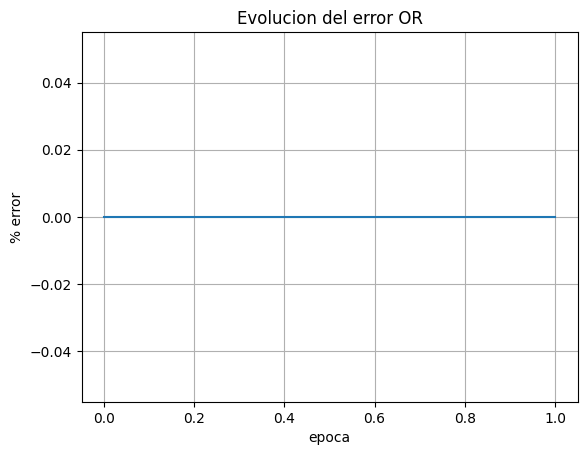

Tasa de error en training: 0.0
Tasa de error en testing: 0.0


In [4]:
import os
import numpy as np
import Perceptron

def cargarCSV(csvRelativePath, delimeter = ','):
    this_folder = os.path.abspath('') 
    fullPath = os.path.join(this_folder, csvRelativePath)
    return np.loadtxt(fullPath, dtype=float, delimiter=delimeter)

def funcionActivacion(v):
    return 1 if v >= 0 else -1

# inicializar random
rng = np.random.default_rng()
# ===== PARAMETROS =====
# Taza de aprendizaje
aprRate = 0.1
# Cantidad maxima de epocas
epocas = 100
# Tolerancia al error
maxErr = 0.1

# ========== TRAINING ==========
# ===== LEER ARCHIVOS =====
# Archivo de training
trainFile = cargarCSV("C:\FICH\INTELIGENCIA COMPUTACIONAL\Guia1\OR_trn.csv")
# Entradas
x = trainFile[:,:-1]
# Salidas esperadas
yd = trainFile[:,-1]

perceptronOR = Perceptron.Perceptron(
    N=x.shape[1],
    rate=aprRate,
    maxEpocas=epocas,
    funcionActivacion=funcionActivacion)

error = perceptronOR.entrenar(
    x,
    yd,
    gifPath="C:\FICH\INTELIGENCIA COMPUTACIONAL\Guia1\OR.gif",
    label='OR',
    targetError=maxErr
)

print(f"Tasa de error en training: {error}")

# ========== TESTING ==========
# ===== LEER ARCHIVOS =====
# Archivo de testing
testFile = cargarCSV("C:\FICH\INTELIGENCIA COMPUTACIONAL\Guia1\OR_tst.csv")
# Entradas
x = testFile[:,:-1]
# Salidas esperadas
yd = testFile[:,-1]

error = perceptronOR.test(x,yd)

print(f"Tasa de error en testing: {error}")

## Ejercicio 2

Implemente una rutina de graficación que permite visualizar, para el caso de dos entradas, los patrones utilizados y la recta de separación que se va ajustando durante el entrenamiento del perceptrón simple. Utilice dicha rutina para visualizar el entrenamiento en los problemas `OR` y `XOR` (utilizando los archivos de datos `OR.trn.csv` y `XOR.trn.csv`).

### Solución

funcion [`trainingGIF`](./Perceptron.py)

<>:3: SyntaxWarning: invalid escape sequence '\F'
<>:24: SyntaxWarning: invalid escape sequence '\F'
<>:3: SyntaxWarning: invalid escape sequence '\F'
<>:24: SyntaxWarning: invalid escape sequence '\F'
C:\Users\giuli\AppData\Local\Temp\ipykernel_6080\560419403.py:3: SyntaxWarning: invalid escape sequence '\F'
  trainFile = cargarCSV("C:\FICH\INTELIGENCIA COMPUTACIONAL\Guia1\XOR_trn.csv")
C:\Users\giuli\AppData\Local\Temp\ipykernel_6080\560419403.py:24: SyntaxWarning: invalid escape sequence '\F'
  testFile = cargarCSV("C:\FICH\INTELIGENCIA COMPUTACIONAL\Guia1\XOR_tst.csv")


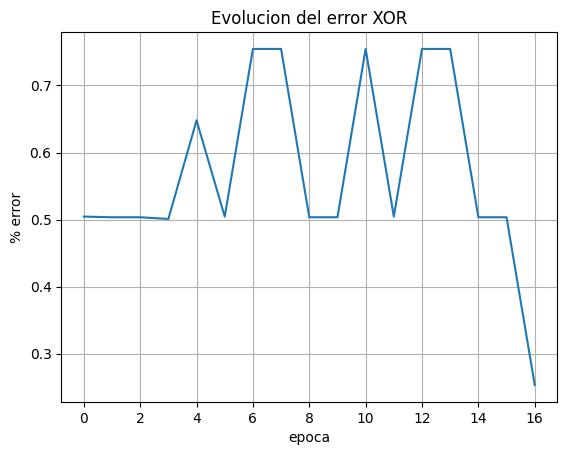

Tasa de error al entrenar Perceptron XOR: 0.2535
Tasa de error al testear Perceptron XOR: 0.31


In [13]:
# ========== XOR ==========
# Trainig
trainFile = cargarCSV("C:\FICH\INTELIGENCIA COMPUTACIONAL\Guia1\XOR_trn.csv")
x = trainFile[:,:-1]
yd = trainFile[:,-1]

perceptronXor = Perceptron.Perceptron(
    N=x.shape[1],
    rate=aprRate,
    maxEpocas=epocas,
    funcionActivacion=funcionActivacion)

error = perceptronXor.entrenar(
    x,
    yd,
    #gifPath='./resultados/XOR.gif', # comentar para no generar gif (tarda mucho)
    label='XOR',
    targetError=0.3
)

print(f"Tasa de error al entrenar Perceptron XOR: {error}")

# Testing
testFile = cargarCSV("C:\FICH\INTELIGENCIA COMPUTACIONAL\Guia1\XOR_tst.csv")
x = testFile[:,:-1]
yd = testFile[:,-1]

error = perceptronXor.test(x,yd)
print(f"Tasa de error al testear Perceptron XOR: {error}")

## Ejercicio 3

Repita el entrenamiento realizado para el caso del `OR`, pero entrenando con los archivos `OR_50_trn.csv` y `OR_90_trn.csv`, y sus correspondientes `OR_50_tst.csv` y `OR_90_tst.csv` para test. Estos datos fueron generados de la misma forma que los usados en el primer ejercicio, pero utilizando desviaciones aleatorias de 50% y 90%, respectivamente. Analice y discuta los resultados.

### Solución

<>:2: SyntaxWarning: invalid escape sequence '\F'
<>:23: SyntaxWarning: invalid escape sequence '\F'
<>:31: SyntaxWarning: invalid escape sequence '\F'
<>:52: SyntaxWarning: invalid escape sequence '\F'
<>:2: SyntaxWarning: invalid escape sequence '\F'
<>:23: SyntaxWarning: invalid escape sequence '\F'
<>:31: SyntaxWarning: invalid escape sequence '\F'
<>:52: SyntaxWarning: invalid escape sequence '\F'
C:\Users\giuli\AppData\Local\Temp\ipykernel_6080\3105534448.py:2: SyntaxWarning: invalid escape sequence '\F'
  trainFile = cargarCSV("C:\FICH\INTELIGENCIA COMPUTACIONAL\Guia1\OR_50_trn.csv")
C:\Users\giuli\AppData\Local\Temp\ipykernel_6080\3105534448.py:23: SyntaxWarning: invalid escape sequence '\F'
  testFile = cargarCSV("C:\FICH\INTELIGENCIA COMPUTACIONAL\Guia1\OR_50_tst.csv")
C:\Users\giuli\AppData\Local\Temp\ipykernel_6080\3105534448.py:31: SyntaxWarning: invalid escape sequence '\F'
  trainFile = cargarCSV("C:\FICH\INTELIGENCIA COMPUTACIONAL\Guia1\OR_90_trn.csv")
C:\Users\giuli\Ap

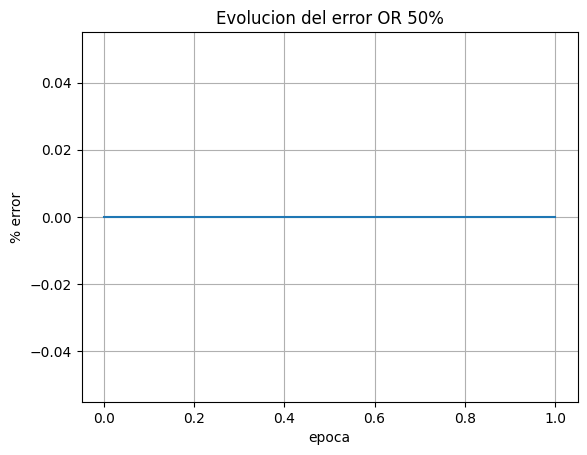

Tasa de error al entrenar con OR_50: 0.0
Tasa de error al testear OR_50: 0.0


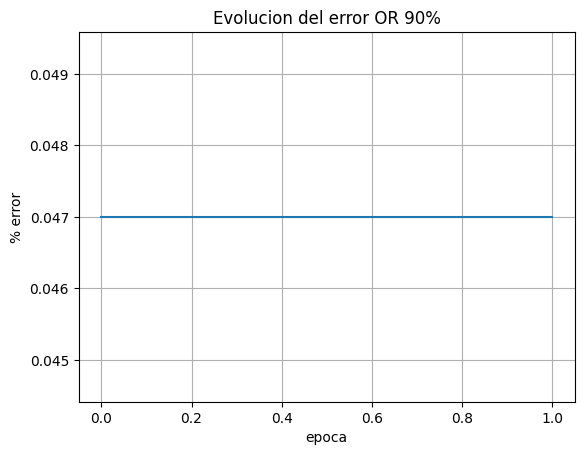

Tasa de error al entrenar con OR_90: 0.047
Tasa de error al testear OR_90: 0.06


In [14]:
# ===== OR 50 =====
trainFile = cargarCSV("C:\FICH\INTELIGENCIA COMPUTACIONAL\Guia1\OR_50_trn.csv")
x = trainFile[:,:-1]
yd = trainFile[:,-1]

perceptronOR50 = Perceptron.Perceptron(
    N=x.shape[1],
    rate=aprRate,
    maxEpocas=epocas,
    funcionActivacion=funcionActivacion
)

error = perceptronOR50.entrenar(
    x,
    yd,
    #gifPath='./resultados/OR50.gif',
    label='OR 50%',
    targetError=maxErr
)

print(f"Tasa de error al entrenar con OR_50: {error}")

testFile = cargarCSV("C:\FICH\INTELIGENCIA COMPUTACIONAL\Guia1\OR_50_tst.csv")
x = testFile[:,:-1]
yd = testFile[:,-1]
error = perceptronOR50.test(x,yd)

print(f"Tasa de error al testear OR_50: {error}")

# ===== OR 90 =====
trainFile = cargarCSV("C:\FICH\INTELIGENCIA COMPUTACIONAL\Guia1\OR_90_trn.csv")
x = trainFile[:,:-1]
yd = trainFile[:,-1]

perceptronOR90 = Perceptron.Perceptron(
    N=x.shape[1],
    rate=aprRate,
    maxEpocas=epocas,
    funcionActivacion=funcionActivacion
)

error = perceptronOR90.entrenar(
    x,
    yd,
    #gifPath='./resultados/OR90.gif',
    label='OR 90%',
    targetError=maxErr
)

print(f"Tasa de error al entrenar con OR_90: {error}")

testFile = cargarCSV("C:\FICH\INTELIGENCIA COMPUTACIONAL\Guia1\OR_90_tst.csv")
x = testFile[:,:-1]
yd = testFile[:,-1]
error = perceptronOR90.test(x,yd)

print(f"Tasa de error al testear OR_90: {error}")